# MNIST fashion data set

## Loading the MNIST fashion data set

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Exploring the format of the MNIST fashion data set

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_images)

60000

In [4]:
train_images.ndim

3

In [5]:
train_images.dtype

dtype('uint8')

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

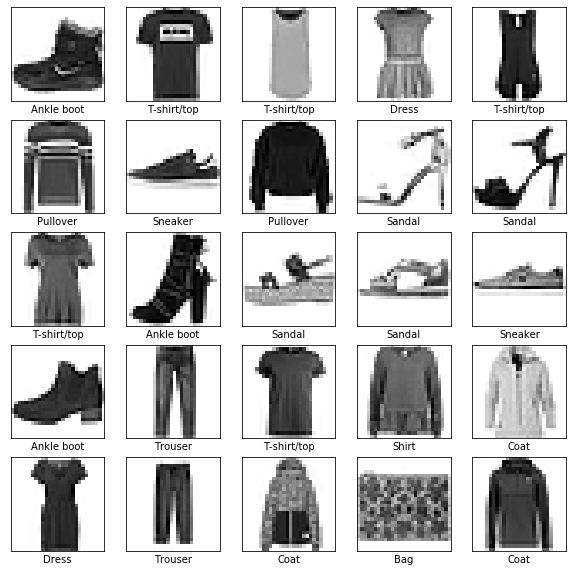

In [10]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

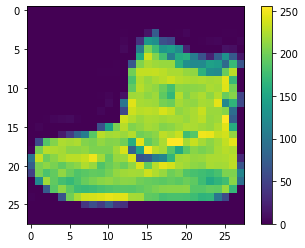

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#OVERFITTING

## Build the model

In [13]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4869 - acc: 0.8262 - val_loss: 0.4659 - val_acc: 0.8262
Epoch 2/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3626 - acc: 0.8682 - val_loss: 0.3933 - val_acc: 0.8607
Epoch 3/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3285 - acc: 0.8787 - val_loss: 0.3866 - val_acc: 0.8601
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3057 - acc: 0.8869 - val_loss: 0.3531 - val_acc: 0.8753
Epoch 5/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2880 - acc: 0.8940 - val_loss: 0.3593 - val_acc: 0.8778
Epoch 6/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2734 - acc: 0.8979 - val_loss: 0.3386 - val_acc: 0.8818
Epoch 7/20
60000/60000 [===========

## Evaluate accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3824 - acc: 0.8898
Test accuracy: 0.8898


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

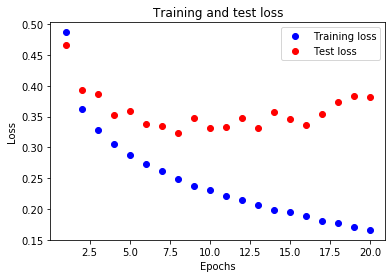

In [16]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

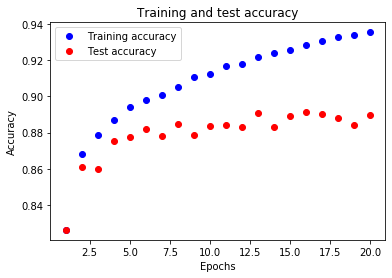

In [18]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#UNDERFITTING

## Build the model

In [19]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softsign)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/sample - loss: 2.3349 - acc: 0.2460 - val_loss: 2.2831 - val_acc: 0.2269
Epoch 2/20
60000/60000 [==============================] - 4s 63us/sample - loss: 2.3024 - acc: 0.2461 - val_loss: 2.3026 - val_acc: 0.2473
Epoch 3/20
60000/60000 [==============================] - 4s 63us/sample - loss: 2.3025 - acc: 0.2461 - val_loss: 2.3026 - val_acc: 0.2472
Epoch 4/20
60000/60000 [==============================] - 4s 64us/sample - loss: 2.3025 - acc: 0.2460 - val_loss: 2.3026 - val_acc: 0.2472
Epoch 5/20
60000/60000 [==============================] - 4s 64us/sample - loss: 2.3009 - acc: 0.2111 - val_loss: 2.3026 - val_acc: 0.1744
Epoch 6/20
60000/60000 [==============================] - 4s 64us/sample - loss: 2.3026 - acc: 0.1753 - val_loss: 2.3026 - val_acc: 0.1744
Epoch 7/20
60000/60000

## Evaluate accuracy

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 2.3026 - acc: 0.1744
Test accuracy: 0.1744


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

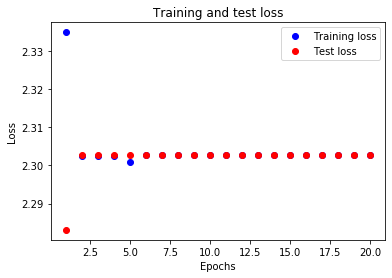

In [22]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

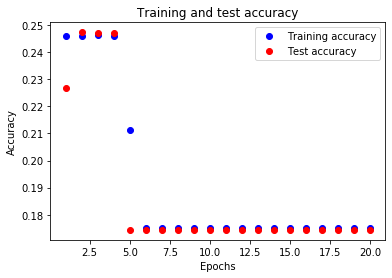

In [24]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#PRETTY GOOD MODEL

## Build the model

In [76]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.7719 - acc: 0.7436 - val_loss: 0.5703 - val_acc: 0.8076
Epoch 2/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5407 - acc: 0.8166 - val_loss: 0.5098 - val_acc: 0.8219
Epoch 3/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4873 - acc: 0.8324 - val_loss: 0.4758 - val_acc: 0.8346
Epoch 4/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4558 - acc: 0.8423 - val_loss: 0.4558 - val_acc: 0.8388
Epoch 5/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4344 - acc: 0.8498 - val_loss: 0.4382 - val_acc: 0.8448
Epoch 6/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4159 - acc: 0.8554 - val_loss: 0.4295 - val_acc: 0.8467
Epoch 7/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4028 - acc: 0.8592 - val_loss: 0.

## Evaluate accuracy

In [77]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3557 - acc: 0.8728
Test accuracy: 0.8728


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

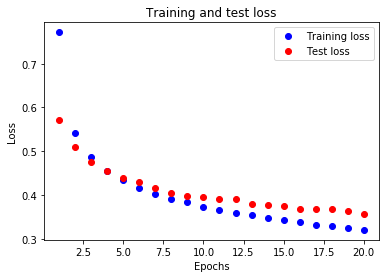

In [79]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

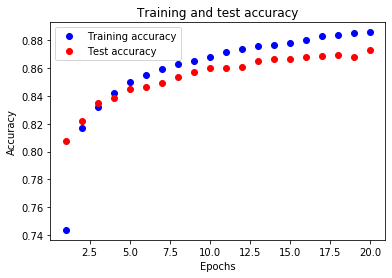

In [81]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()